# Using 2017 BoM data to plot and display temperatures and precipitations #

### Step 1 : Importing the libraries ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This line tells the notebook to show plots inside of the notebook
%matplotlib inline


### Step 2 : Importing csv file to display the data ###

In [2]:
#Let's first import and read the data to get a first raw result

df_test = pd.read_csv("weather2017_1H_68241.csv")
print(df_test.head())
                  

           valid_start            valid_end  station_number  T_Celsius  \
0  2017-01-01 00:00:00  2017-01-01 01:00:00           68241       21.5   
1  2017-01-01 01:00:00  2017-01-01 02:00:00           68241       21.6   
2  2017-01-01 02:00:00  2017-01-01 03:00:00           68241       21.5   
3  2017-01-01 03:00:00  2017-01-01 04:00:00           68241       21.1   
4  2017-01-01 04:00:00  2017-01-01 05:00:00           68241       21.0   

   MinT_Celsius  MaxT_Celsius  Precip_mm  
0          21.5          21.8        0.0  
1          21.4          21.6        0.0  
2          21.1          21.5        0.0  
3          20.9          21.2        0.2  
4          20.9          21.1        0.0  


### Step 3 : Try plotting temperatures data without any formatting ###

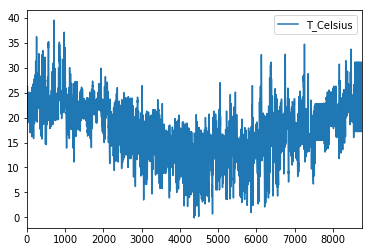

In [3]:
df_test_T=df_test[['valid_start', 'T_Celsius']]
df_test_T.plot()

The resulting graph makes sense with higher temperatures in summer compared to winter. The vertical axis looks fine, however the horizontal axis doesn't display the dates properly. The abundance of data makes the reading of temperatures very confusing. We will need to take the following steps in order to improve the result:

1. Aggregate the data by weeks or month for example
2. Check and correct the horizontal axis format
3. Improve the graph presentation (make it appear bigger for instance)


### Step 4 : Data aggregation and horizontal axis formatting ###

       station_number    T_Celsius  MinT_Celsius  MaxT_Celsius    Precip_mm
count          8760.0  8760.000000   8760.000000   8760.000000  8760.000000
mean          68241.0    17.354361     16.618139     18.125868     0.110320
std               0.0     5.925358      5.951256      5.919208     1.166814
min           68241.0    -0.100000     -0.500000      0.600000     0.000000
25%           68241.0    13.200000     12.500000     14.075000     0.000000
50%           68241.0    17.700000     17.000000     18.300000     0.000000
75%           68241.0    21.600000     21.000000     22.200000     0.000000
max           68241.0    39.500000     35.600000     41.700000    50.000000


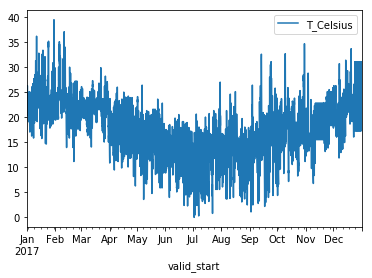

In [4]:
#After some research, we are told that we can parse the dates and set the valid_start column as an index when reading the data

df1=pd.read_csv("weather2017_1H_68241.csv",parse_dates=['valid_start'],
                     index_col='valid_start')

print(df1.describe())

df1_T=df1[['T_Celsius']]
df1_T.plot()

It seems the reading method has helped formatting the horizontal axis better with au automatic display by months.
However the abundance of data remains confusing so we shall now try to group those by week average.

1. Aggregate the data by weeks or month for example -> next step
2. Check and correct the horizontal axis format -> ok


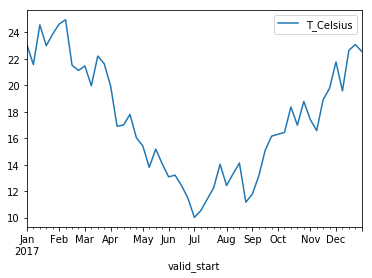

In [5]:
#Having tried a grouping by days & months it seems the grouping by week is a reasonable compromise.

df2=df1.resample('W').mean()
df2_T=df2[['T_Celsius']]
df2_T.plot()

The format is now improved, we can now work on improving the graph layout while adding more data.

1. Aggregate the data by weeks or month for example -> ok
2. Check and correct the horizontal axis format -> ok
3. Improve the graph presentation (make it appear bigger for instance) -> next step
4. Add more data -> next step



### Step 5 : Improving format of the graph and adding more data ###

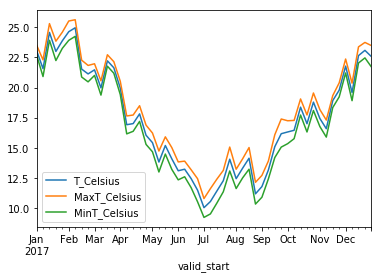

In [6]:
#Let's try to add Min & Max T data and plot the result to have a first view of the 3 series of data together.

df2_TMinMax = df2[['T_Celsius','MaxT_Celsius','MinT_Celsius']]
df2_TMinMax.plot()

The result looks alright, let's now add some title and better layout. This time we will rely on the different attributes of plt() instead of just displaying au automatic plotting with .plot()

Current size: [15.0, 7.5]
New size: [15, 7.5]


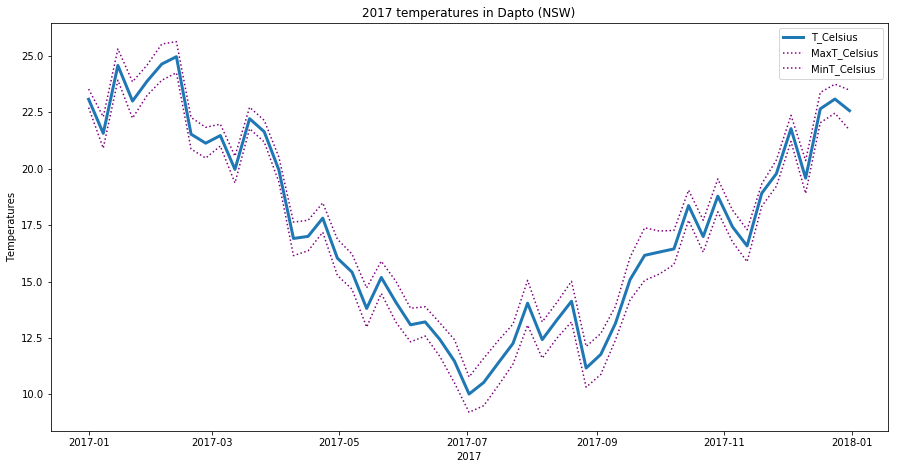

In [32]:
# a/ We first want to increase the size of the graph:

fig_size = plt.rcParams["figure.figsize"]
print ("Current size:", fig_size)

fig_size[0] = 15
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size
print ("New size:", fig_size)

# b/ We plot the temperatures with a specific formatting

x = df2.index # This will make the code easier to write
plt.plot(x, df2['T_Celsius'],linewidth=3.0) 
plt.plot(x, df2['MaxT_Celsius'],color='purple', linestyle='dotted') 
plt.plot(x, df2['MinT_Celsius'],color='purple', linestyle='dotted')

# c/ We name the axis 
plt.xlabel('2017') 
plt.ylabel('Temperatures') 

# d/ We give a title to the graph 
plt.title('2017 temperatures in Dapto (NSW)') 
  
# e/ We show the legend on the plot 
plt.legend() 

# f/ We display the plot 
plt.show() 


That graph looks better. In step 6 We can now focus on trying to add data that have a different scale

### Step 6 : Adding data with a different scale -> Precipitations ###

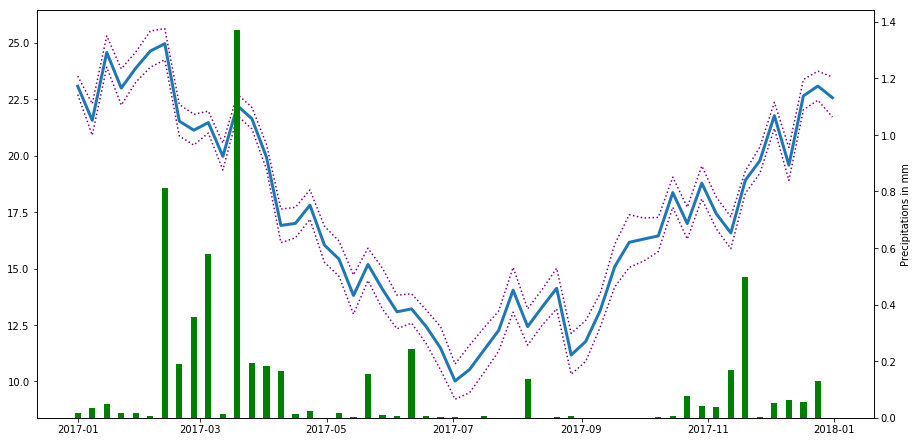

In [33]:
# Prepare the data we want to display

fig, ax1 = plt.subplots()

# Plot the data that share the same y axis

ax1.plot(x, df2['T_Celsius'],linewidth=3.0) 
ax1.plot(x, df2['MaxT_Celsius'],color='purple', linestyle='dotted') 
ax1.plot(x, df2['MinT_Celsius'],color='purple', linestyle='dotted')

# instantiate a second y axis that shares the same x-axis

ax2 = ax1.twinx()  

ax2.set_ylabel('Precipitations in mm')  
ax2.bar(x, df2['Precip_mm'], color='green',width=3.0)

plt.show()

Around Dapto, we can observe that higher precipitations occur between February to April and around November. Lower temperatures periods also have less precipitations. It would be interesting to run a similar analysis on a range of 10 years for instance to verify those data 

### Step 7 : Improving x axis dates display MM/YYYY ###
Examples: %Y - 4 digit year %y - 2 digit year %m - month %d - day 

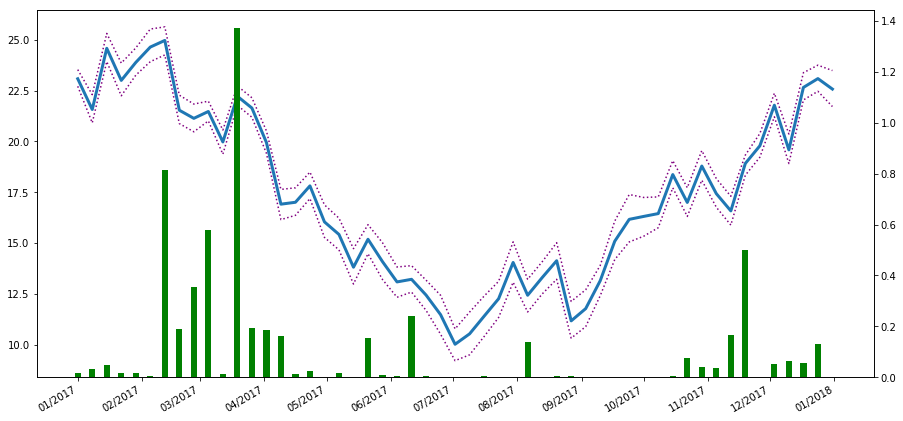

In [45]:
from matplotlib.dates import DateFormatter

# Prepare the data we want to display

fig, ax1 = plt.subplots()

# Plot the data 

ax1.plot(x, df2['T_Celsius'],linewidth=3.0) 
ax1.plot(x, df2['MaxT_Celsius'],color='purple', linestyle='dotted') 
ax1.plot(x, df2['MinT_Celsius'],color='purple', linestyle='dotted')

ax2 = ax1.twinx()  
ax2.bar(x, df2['Precip_mm'], color='green',width=3.0)

# Define the date format
myFmt = DateFormatter("%m/%Y")
months = mdates.MonthLocator()  # every month

# tell matplotlib to use the format specified above
ax2.xaxis.set_major_formatter(myFmt);

# Make sure each month is displayed
ax2.xaxis.set_major_locator(months)

#rotates and right aligns the x labels
fig.autofmt_xdate()

plt.show()
